# Logistic Regression 

In this project we will be working with a The Breast Dataset, indicating whether a patient has breat cancer or not. Thus, we will try to create a logistic regression model that will make the classification of future patients.

This data set contains the following features:

* 'Sample code number': id number 
* 'Clump Thickness': 1  -  10
* 'Uniformity of Cell Shape': 1  -  10
* 'Marginal Adhesion': 1  -  10
* 'Single Epithelial Cell Size': 1  -  10
* 'Bare Nuclei': 1  -  10
* 'Bland Chromatin': 1  -  10
* 'Normal Nucleoli': 1  -  10
* 'Mitoses': 1  -  10
* 'Class': (2 for benign, 4 for malignant)

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
**Read in the Breast.xlsx file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_excel('Breast.xlsx')

**Check the head of ad_data**

In [3]:
ad_data.head()

,ID,X1,X3,X4,X5,X6,X7,X8,Class
0,1000025,5,1,1,2,1,3,1,2
1,1015425,3,1,1,2,2,3,1,2
2,1016277,6,8,1,3,4,3,7,2
3,1017023,4,1,3,2,1,3,1,2
4,1017122,8,10,8,7,10,9,7,4


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
ID       629 non-null int64
X1       629 non-null int64
X3       629 non-null int64
X4       629 non-null int64
X5       629 non-null int64
X6       629 non-null int64
X7       629 non-null int64
X8       629 non-null int64
Class    629 non-null int64
dtypes: int64(9)
memory usage: 44.3 KB


In [8]:
ad_data[['X1', 'X3', 'X4','X5', 'X6','X7', 'X8', 'Class']].describe()

,X1,X3,X4,X5,X6,X7,X8,Class
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,4.496025,3.275040,2.914149,3.289348,3.610493,3.507154,2.958665,2.731320
std,2.864576,3.005149,2.928382,2.252860,3.663291,2.471886,3.121970,0.963996
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,4.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000
75%,6.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Clump Thickness**

Text(0.5,0,'Clump Thickness')

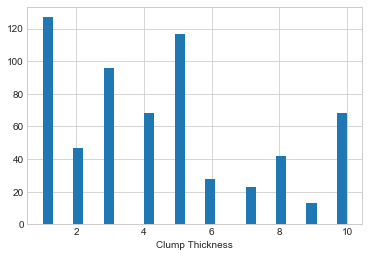

In [6]:
sns.set_style('whitegrid')
ad_data['X1'].hist(bins=30)
plt.xlabel('Clump Thickness')

**Create a jointplot showing Clump Thickness versus Uniformity of Cell Shape.**

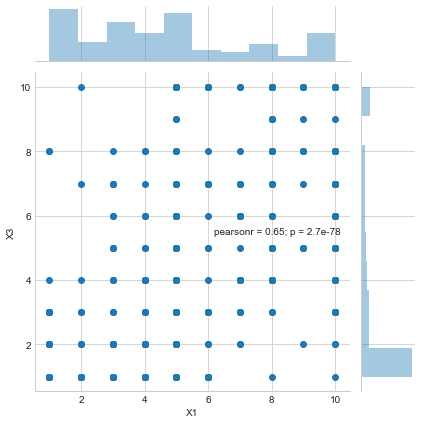

In [7]:
sns.jointplot(x='X1',y='X3',data=ad_data)

**Create a jointplot showing the kde distributions of Clump Thickness on site vs. Uniformity of Cell Shape.**

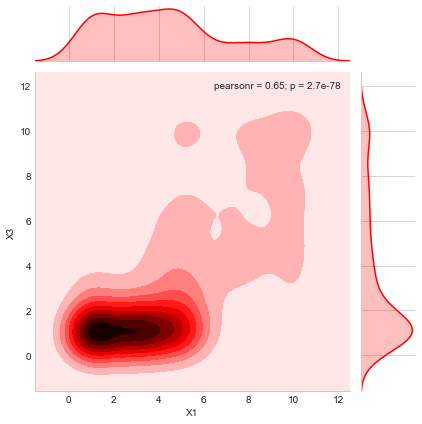

In [8]:
sns.jointplot(x='X1',y='X3',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Single Epithelial Cell Size' vs. 'Bland chromatin'**

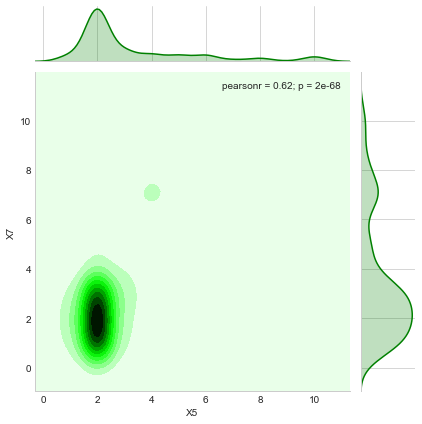

In [9]:
sns.jointplot(x='X5',y='X7',data=ad_data,color='green',kind='kde')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

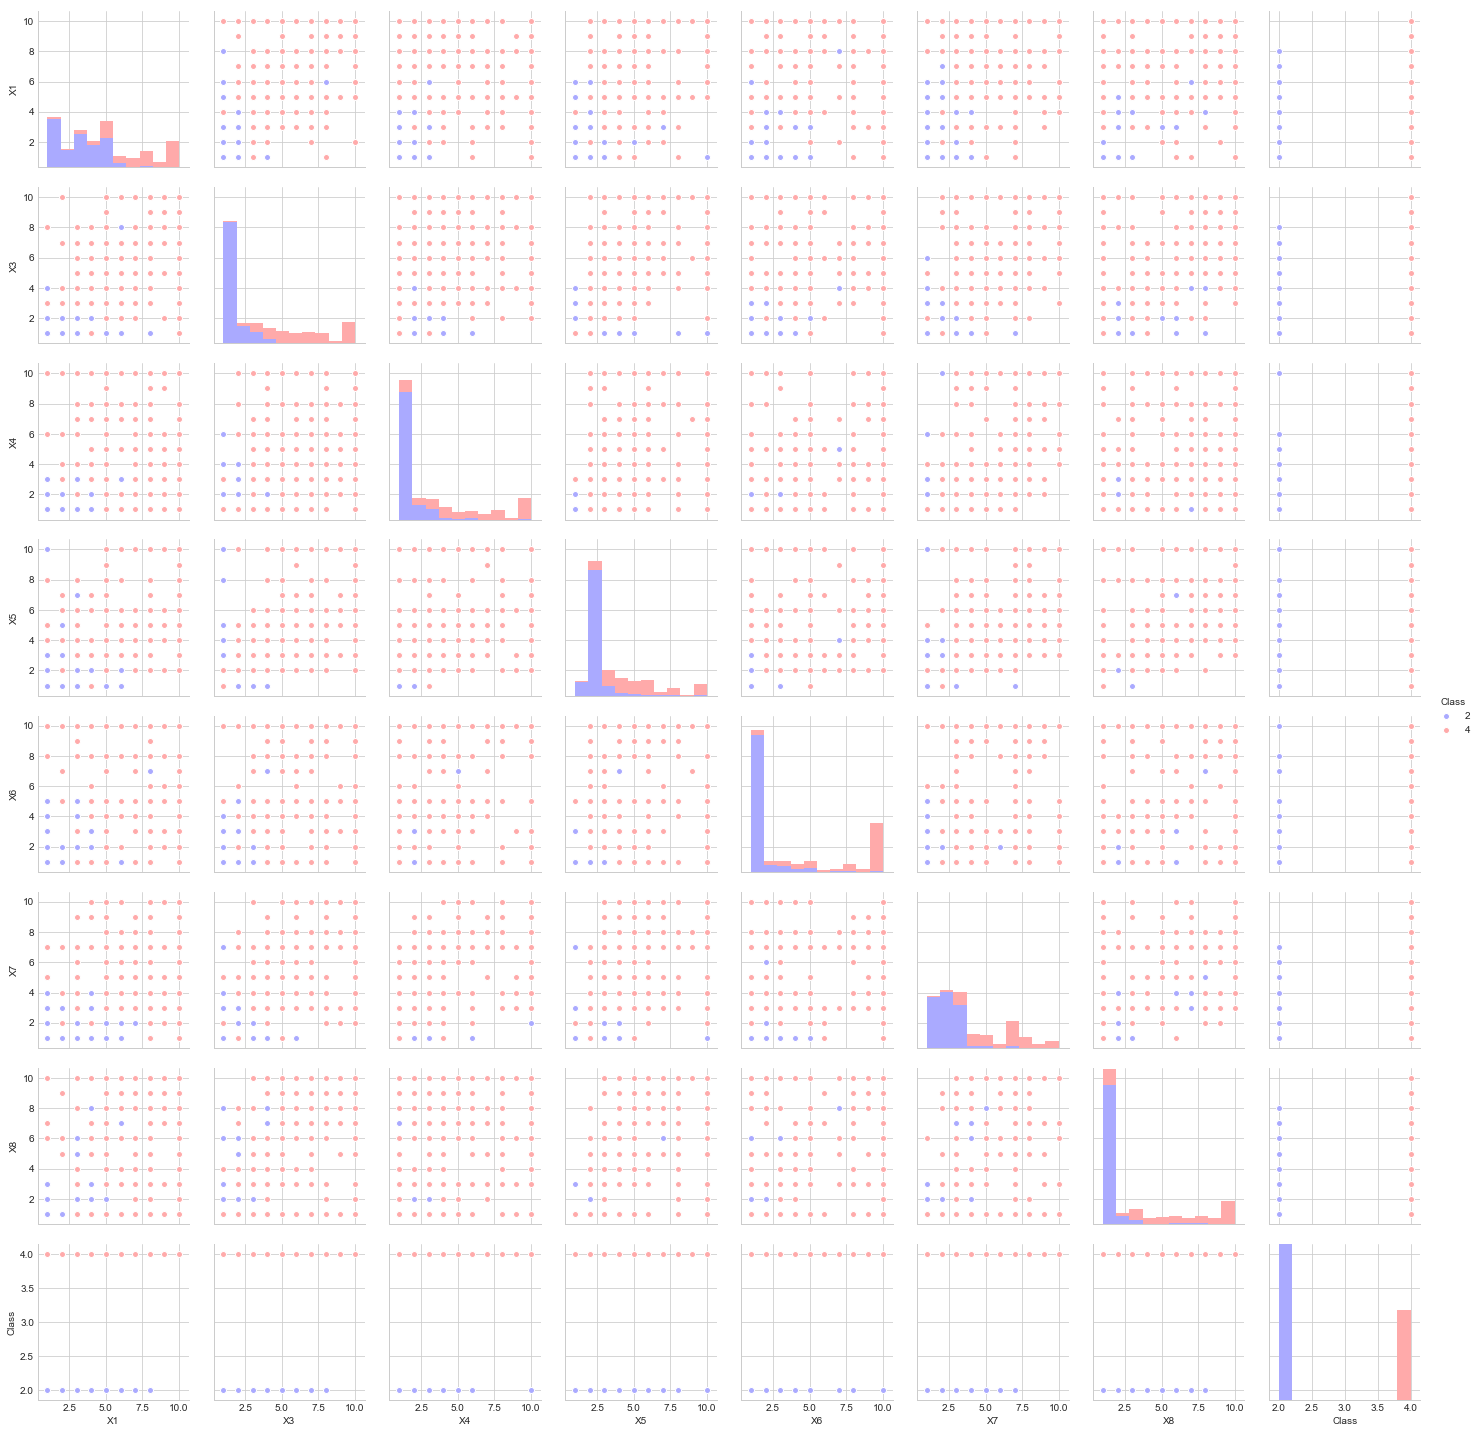

In [10]:
sns.pairplot(ad_data[['X1', 'X3', 'X4','X5', 'X6','X7', 'X8', 'Class']],hue='Class',palette='bwr')

# Logistic Regression

It's time to do a train test split, and train our model!


** Split the data into training set and testing set using train_test_split**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = ad_data[['X1', 'X3', 'X4','X5', 'X6','X7', 'X8']]
y = ad_data['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.head()

,X1,X3,X4,X5,X6,X7,X8
494,2,1,1,1,1,1,1
244,8,7,1,3,10,3,9
551,5,1,1,2,1,1,1
213,1,1,1,1,1,3,1
532,5,1,1,2,1,1,1


** Train and fit a logistic regression model on the training set.**

In [32]:
from sklearn.linear_model import LogisticRegressionCV

In [33]:
logmodel = LogisticRegressionCV(cv=10)
logmodel.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [34]:
predictions = logmodel.predict(X_test)
logPred=logmodel.predict(X)
logPred=logPred.tolist()
y=y.tolist()
#logmodel.score(logmodel.predict(X),y)

** Create a classification report for the model.**

In [35]:
from sklearn.metrics import classification_report
from itertools import cycle

In [36]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          2       0.99      0.98      0.98       121
          4       0.96      0.99      0.97        68

avg / total       0.98      0.98      0.98       189



In [37]:
###Confusion matrix with sklearn
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
cnf_matrix = confusion_matrix(y,logPred)

Confusion matrix, without normalization
[[391   8]
 [  7 223]]


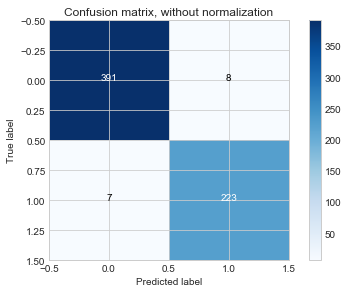

In [38]:
## Confusion matrix plot
def plot_confusion_matrix(cm,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
## Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
    

Auc_train: 0.9961142197353229
Auc_test: 0.9986631016042781


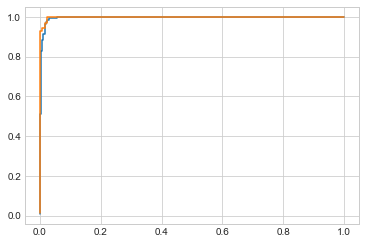

In [48]:
from sklearn import preprocessing
##Computing false and true positive rates

lb = preprocessing.LabelBinarizer()
y_train = np.asarray(y_train)
y_train=lb.fit_transform(y_train)
y_test = np.asarray(y_test)
y_test=lb.fit_transform(y_test)


train_probs = logmodel.predict_proba(X_train)[:,1]
test_probs = logmodel.predict_proba(X_test)[:,1]


train_probs
auc_train = roc_auc_score(y_train, train_probs)
auc_test = roc_auc_score(y_test, test_probs)

print('Auc_train: {}'.format(auc_train))
print('Auc_test: {}'.format(auc_test))

roc_train = roc_curve(y_train, train_probs)
roc_test = roc_curve(y_test, test_probs)

plt.plot(roc_train[0], roc_train[1])

plt.plot(roc_test[0], roc_test[1])
plt.show()

## End!